In [1]:
import glob
import os
import pickle
import pandas as pd

In [2]:
from auxiliary import *

In [3]:
% matplotlib inline

In [4]:
nirSnr = 1000
expName = 'snr_vvv%d_nirSens' % nirSnr
mainDir='/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY\
/DATA_vvv%d/' % nirSnr
filePattern = 'S20031932003196.L3b_4D*'
fileList = glob.glob(os.path.join(mainDir,filePattern))
snrs = ['NIR_SNR_' + str(k) for k in range(500,850,50)]
simDict = dict.fromkeys(snrs)
for file in fileList:
    sfx = int(file.split('.')[1][-2:])
    snr = (sfx - 20) * 50 + 500
    snr = 'NIR_SNR_' + str(snr)
    simDict[snr] = file

In [5]:
simDict

{'NIR_SNR_500': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU20.nc',
 'NIR_SNR_550': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU21.nc',
 'NIR_SNR_600': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc',
 'NIR_SNR_650': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU23.nc',
 'NIR_SNR_700': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU24.nc',
 'NIR_SNR_750': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU25.nc',
 'NIR_SNR_800': '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU26.nc'}

In [6]:
rhoUnc95Dict = dict.fromkeys(snrs)
for snr in snrs:
    # Get data needed in form of a dict.
    if simDict[snr]:
        print('processing %s' % simDict[snr])
        _,rhoUncDict,_ = GetDataDicts(fp=simDict[snr])
        # Fill out 95 ptile dictionary for corresponding snr sim - result is a nested dictionary with
        # bands as keys to the internal dict
        rhoUnc95Dict[snr] = GetPtileDict(rhoUncDict) 
pickle.dump(rhoUnc95Dict,open('%s.p' % expName,'wb'))

processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU20.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU21.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU22.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU23.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU24.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU25.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA_vvv1000/S20031932003196.L3b_4D_SU26.nc


In [7]:
df95 = pd.DataFrame(rhoUnc95Dict)
df95.dropna(axis=1,how='all',inplace=True)
df95.to_pickle('df_%s.p' % expName)

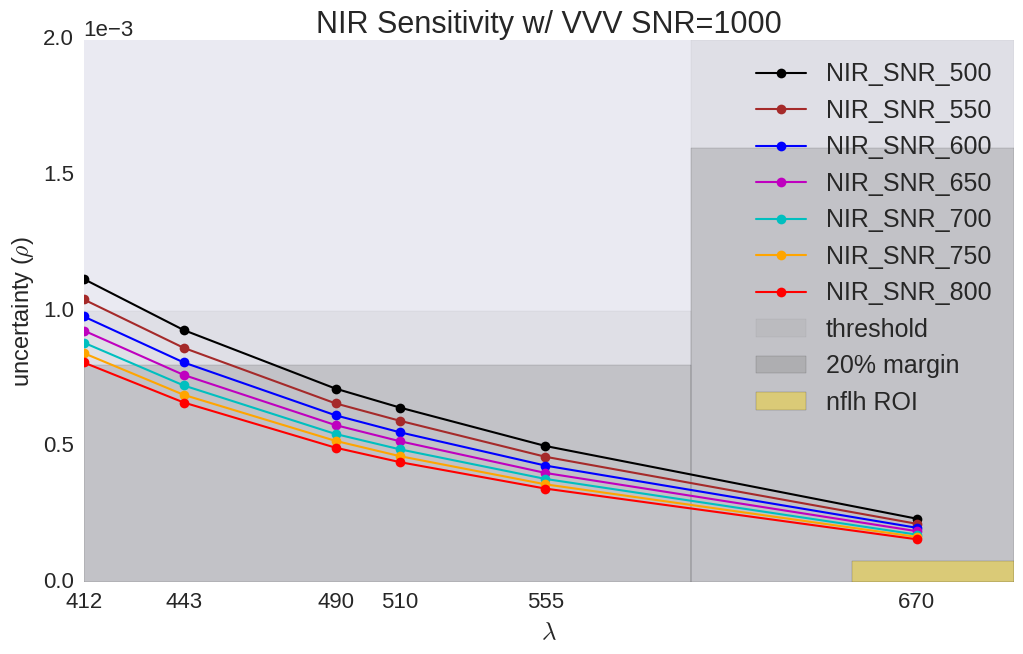

In [8]:
SummaryPlot(df95,savepath='snrSens_vvv%dnir500_800.png' % nirSnr,
           title='NIR Sensitivity w/ VVV SNR=%d' % nirSnr,margin=True)